<a href="https://colab.research.google.com/github/ddebashish21/Big-Mart-Sales-Prediction/blob/main/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Prediction for Big Mart Outlets**
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

The dataset is divided into two parts the first part is train dataset which has all the variables including the target variable and the second part is test dataset which has all the variables excluding the target variable which we need to predict in this model.

# The different variables and their explanations
* **Item_Identifier-**	Unique product ID
* **Item_Weight-**	Weight of product
* **Item_Fat_Content-**	Whether the product is low fat or not
* **Item_Visibility-**	The % of total display area of all products in a store allocated to the particular product
* **Item_Type-**	The category to which the product belongs
* **Item_MRP-**	Maximum Retail Price (list price) of the product
* **Outlet_Identifier-**	Unique store ID
* **Outlet_Establishment_Year-**	The year in which store was established
* **Outlet_Size-**	The size of the store in terms of ground area covered
* **Outlet_Location_Type-**	The type of city in which the store is located
* **Outlet_Type-**	Whether the outlet is just a grocery store or some sort of supermarket
* **Item_Outlet_Sales-**	Sales of the product in the particular store. This is the outcome variable to be predicted. (**Target Variable**)

# Exploratory Data Analysis

**Importing the essential libraries and understanding the variables**

In [76]:
#importing all the essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [77]:
#importing the data
data=pd.read_csv('/content/train_v9rqX0R.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [78]:
data.shape # Dimension of the dataset

(8523, 12)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [80]:
data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [81]:
data.isnull().sum() # Identifying the missing values in the dataset

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Checking the unique values of all the categorical variables in the dataset

In [82]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Item fat content variable has only two types of values Low Fat and Regular, others are either short form or lower case of these values.

In [83]:
# Replacing the duplicate values
data.Item_Fat_Content.replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'},inplace=True)

In [84]:
data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [85]:
data.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [86]:
data.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [87]:
data.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [88]:
data.nunique()

,0
Item_Identifier,1559
Item_Weight,415
Item_Fat_Content,2
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


**Handling the missing values**

Here only two variables have missing values in it Item_Weight and Outlet_size. Outlet size is categorical variable and Item_Weight is continuous variable.

<Axes: >

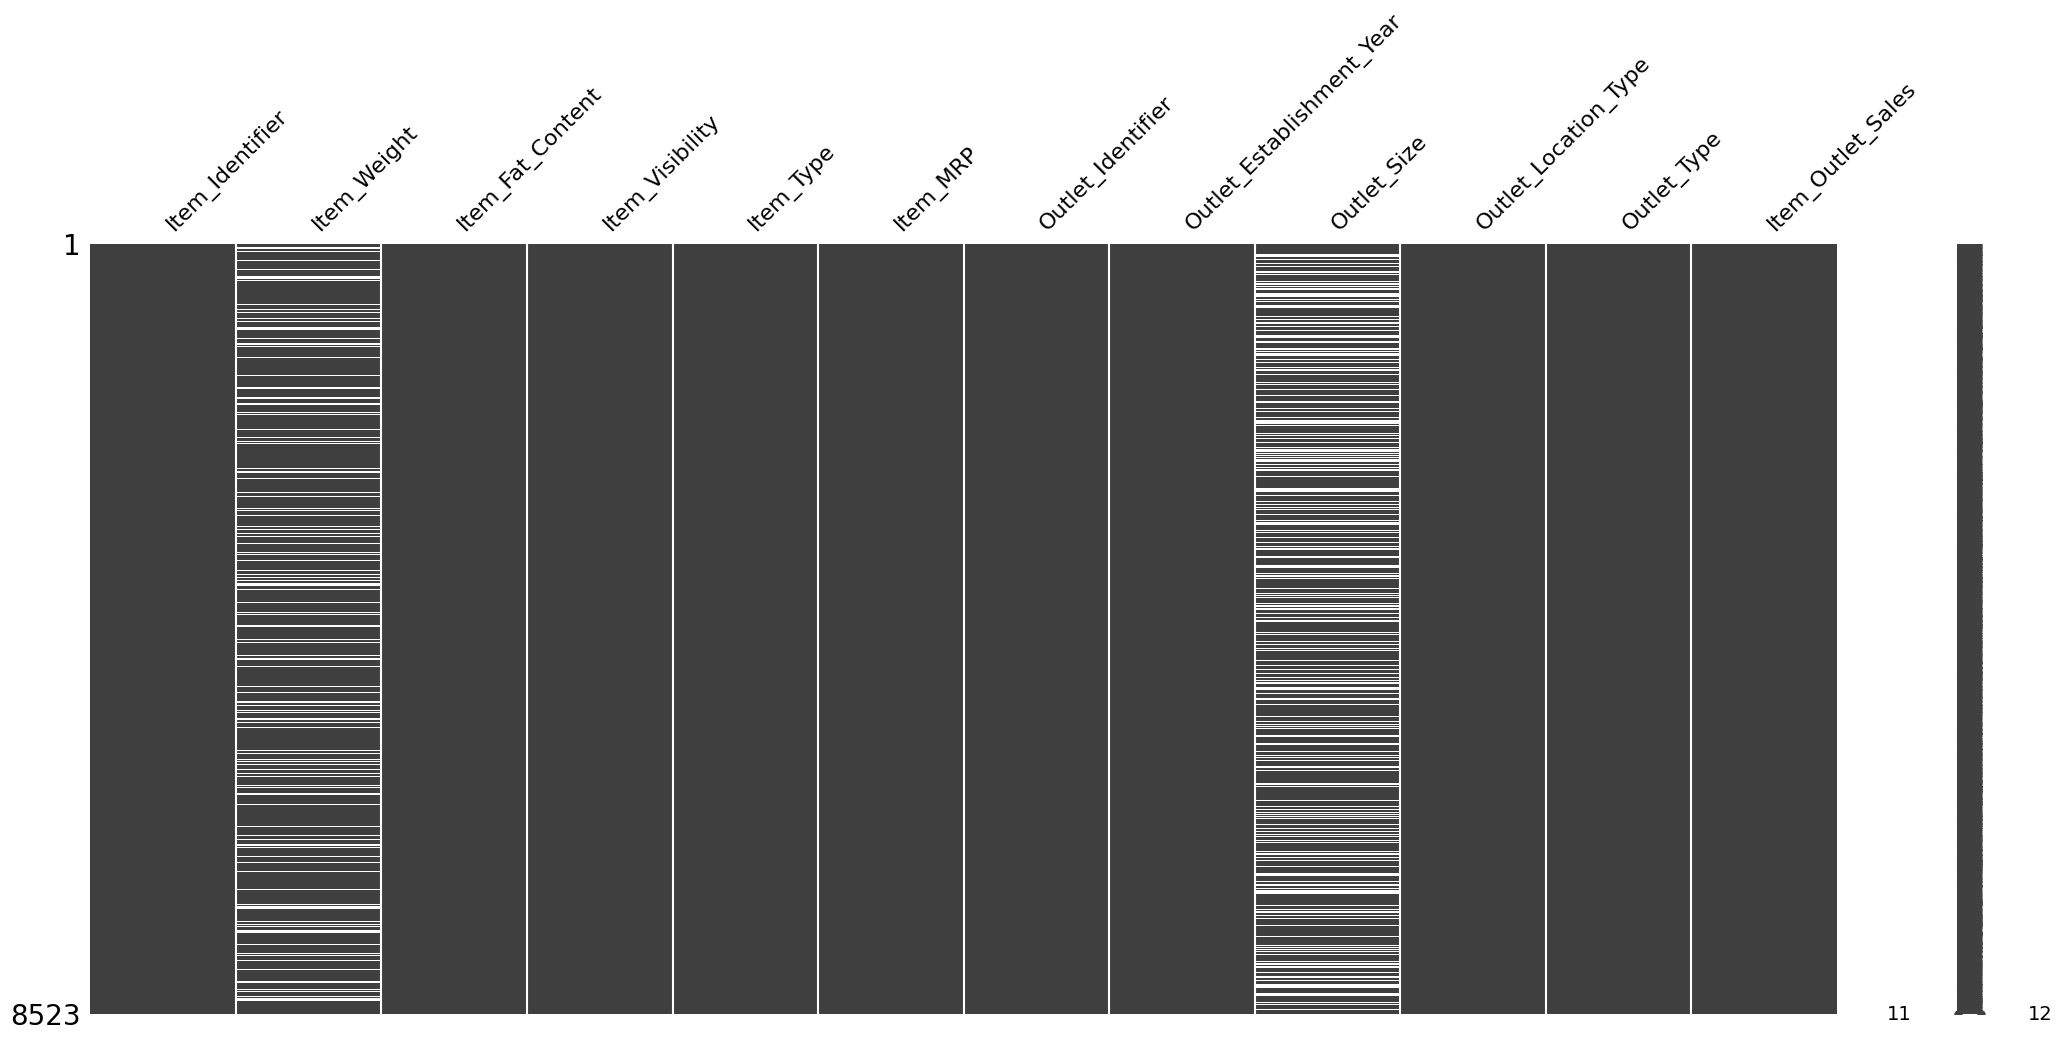

In [89]:
# Visualizing the missing values in the dataset
import missingno as msno
msno.matrix(data)

Checking for the missing values for a particular item and a particular outlet

In [90]:
data[data.Item_Identifier=='FDA15'].head(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392


In [91]:
data[data['Outlet_Identifier']=='OUT045'].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972
56,NCX54,9.195,Low Fat,0.048157,Household,106.1622,OUT045,2002,NaN,Tier 2,Supermarket Type1,2117.2440


Here for a particular Item its weight, fat content and type is same and similarly for a particular outlet the establishment year, size, location type and type remians the same. So we will use knn imputation method to fill the missing values.

Dividing the dataset into Item dataset and outlet dataset for filling the missing values using knn imputation

In [92]:
Item_data=data.loc[:,['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Type','Item_MRP']]

In [93]:
Item_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP
0,FDA15,9.30,Low Fat,Dairy,249.8092
1,DRC01,5.92,Regular,Soft Drinks,48.2692
2,FDN15,17.50,Low Fat,Meat,141.6180
3,FDX07,19.20,Regular,Fruits and Vegetables,182.0950
4,NCD19,8.93,Low Fat,Household,53.8614


In [94]:
# Encoding the item data
from sklearn.preprocessing import OrdinalEncoder
encode1=OrdinalEncoder()
Item_data.loc[:,['Item_Identifier', 'Item_Fat_Content', 'Item_Type']]=encode1.fit_transform(Item_data.loc[:,['Item_Identifier', 'Item_Fat_Content', 'Item_Type']])
Item_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP
0,156.0,9.30,0.0,4.0,249.8092
1,8.0,5.92,1.0,14.0,48.2692
2,662.0,17.50,0.0,10.0,141.6180
3,1121.0,19.20,1.0,6.0,182.0950
4,1297.0,8.93,0.0,9.0,53.8614


In [95]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3)
imputed_data=imputer.fit_transform(Item_data)
Item_data=pd.DataFrame(imputed_data, columns=Item_data.columns)
Item_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP
0,156.0,9.30,0.0,4.0,249.8092
1,8.0,5.92,1.0,14.0,48.2692
2,662.0,17.50,0.0,10.0,141.6180
3,1121.0,19.20,1.0,6.0,182.0950
4,1297.0,8.93,0.0,9.0,53.8614


In [96]:
# Reverse encoding the data
Item_data.loc[:,['Item_Identifier', 'Item_Fat_Content', 'Item_Type']]=encode1.inverse_transform(Item_data.loc[:,['Item_Identifier', 'Item_Fat_Content', 'Item_Type']])
Item_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP
0,FDA15,9.30,Low Fat,Dairy,249.8092
1,DRC01,5.92,Regular,Soft Drinks,48.2692
2,FDN15,17.50,Low Fat,Meat,141.6180
3,FDX07,19.20,Regular,Fruits and Vegetables,182.0950
4,NCD19,8.93,Low Fat,Household,53.8614


In [97]:
Item_data[Item_data.Item_Identifier=='FDA15'].head(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP
0,FDA15,9.3,Low Fat,Dairy,249.8092
831,FDA15,9.3,Low Fat,Dairy,250.2092
2599,FDA15,9.3,Low Fat,Dairy,248.5092
2643,FDA15,9.3,Low Fat,Dairy,249.6092
4874,FDA15,9.3,Low Fat,Dairy,248.9092
5413,FDA15,9.3,Low Fat,Dairy,250.6092
6696,FDA15,9.3,Low Fat,Dairy,249.5092


The data is filled with the right value

In [98]:
Item_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Type,0
Item_MRP,0


In [99]:
Outlet_data=data.loc[:,['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
Outlet_data.head()

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,OUT010,1998,NaN,Tier 3,Grocery Store
4,OUT013,1987,High,Tier 3,Supermarket Type1


Here Outlet_size has an order which is small, medium and high

In [100]:
# Encoding the dataset
encode2=OrdinalEncoder(categories=[['Small', 'Medium', 'High', np.nan]])
Outlet_data.loc[:,['Outlet_Identifier','Outlet_Location_Type','Outlet_Type']]=encode1.fit_transform(Outlet_data.loc[:,['Outlet_Identifier','Outlet_Location_Type','Outlet_Type']])
Outlet_data.loc[:,['Outlet_Size']]=encode2.fit_transform(Outlet_data.loc[:,['Outlet_Size']])
Outlet_data.head()

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.0,1999,1.0,0.0,1.0
1,3.0,2009,1.0,2.0,2.0
2,9.0,1999,1.0,0.0,1.0
3,0.0,1998,NaN,2.0,0.0
4,1.0,1987,2.0,2.0,1.0


In [101]:
imputer1=KNNImputer(n_neighbors=3)
imputed_data1=imputer1.fit_transform(Outlet_data)
Outlet_data=pd.DataFrame(imputed_data1, columns=Outlet_data.columns)
Outlet_data.head()

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.0,1999.0,1.0,0.0,1.0
1,3.0,2009.0,1.0,2.0,2.0
2,9.0,1999.0,1.0,0.0,1.0
3,0.0,1998.0,0.0,2.0,0.0
4,1.0,1987.0,2.0,2.0,1.0


In [102]:
Outlet_data.loc[:,['Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']]=encode1.inverse_transform(Outlet_data.loc[:,['Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']])
Outlet_data.loc[:,['Outlet_Size']]=encode2.inverse_transform(Outlet_data.loc[:,['Outlet_Size']])
Outlet_data.head()

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT049,1999.0,Medium,Tier 1,Supermarket Type1
1,OUT018,2009.0,Medium,Tier 3,Supermarket Type2
2,OUT049,1999.0,Medium,Tier 1,Supermarket Type1
3,OUT010,1998.0,Small,Tier 3,Grocery Store
4,OUT013,1987.0,High,Tier 3,Supermarket Type1


In [103]:
Outlet_data[Outlet_data['Outlet_Identifier']=='OUT045'].head()

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8,OUT045,2002.0,Small,Tier 2,Supermarket Type1
33,OUT045,2002.0,Small,Tier 2,Supermarket Type1
46,OUT045,2002.0,Small,Tier 2,Supermarket Type1
47,OUT045,2002.0,Small,Tier 2,Supermarket Type1
56,OUT045,2002.0,Small,Tier 2,Supermarket Type1


In [104]:
Outlet_data.isnull().sum()

,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


In [105]:
Item_visibility=data.loc[:,['Item_Visibility']]
Item_outlet_sales=data.loc[:,['Item_Outlet_Sales']]
cleaned_data=pd.concat([Item_data, Item_visibility, Outlet_data, Item_outlet_sales], axis=1)
cleaned_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Item_Visibility,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,Dairy,249.8092,0.016047,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,Soft Drinks,48.2692,0.019278,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,Meat,141.6180,0.016760,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,Fruits and Vegetables,182.0950,0.000000,OUT010,1998.0,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,Household,53.8614,0.000000,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052


This is the cleaned dataset that we have derieved

In [106]:
cleaned_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Type,0
Item_MRP,0
Item_Visibility,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


**Checking for the skewness and treating it**

<Axes: xlabel='Item_Weight', ylabel='Count'>

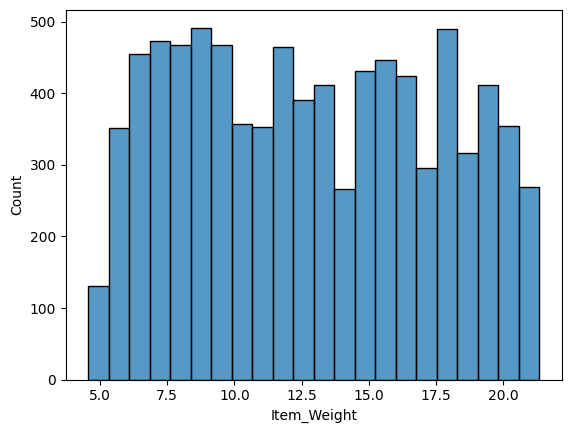

In [107]:
sns.histplot(cleaned_data['Item_Weight'])

<Axes: xlabel='Item_MRP', ylabel='Count'>

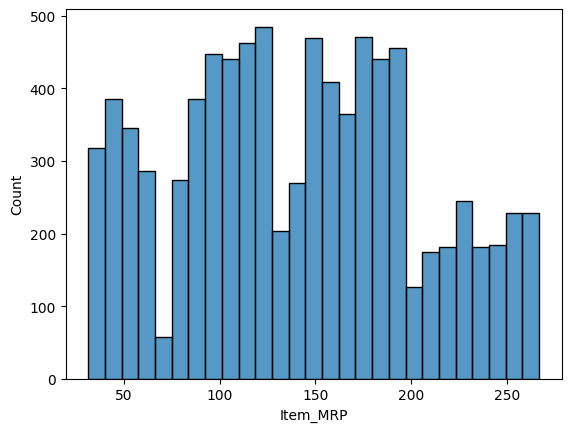

In [108]:
sns.histplot(cleaned_data['Item_MRP'])

<Axes: xlabel='Item_Visibility', ylabel='Count'>

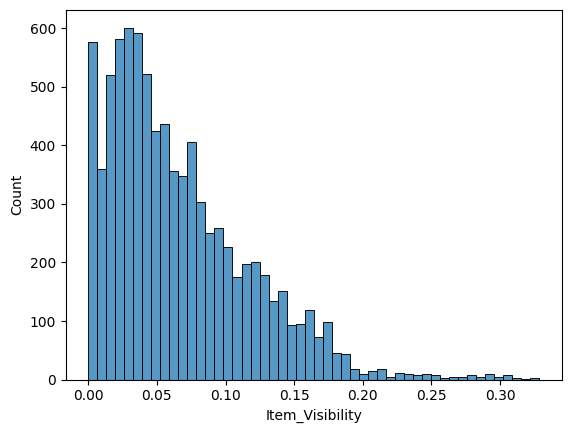

In [109]:
sns.histplot(cleaned_data['Item_Visibility'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

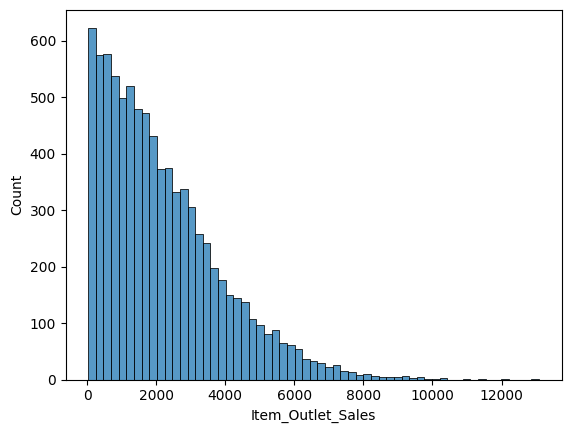

In [110]:
sns.histplot(cleaned_data['Item_Outlet_Sales'])

Here none of the numerical data is normally distributed

**Dealing with the outliers**

<Axes: ylabel='Item_MRP'>

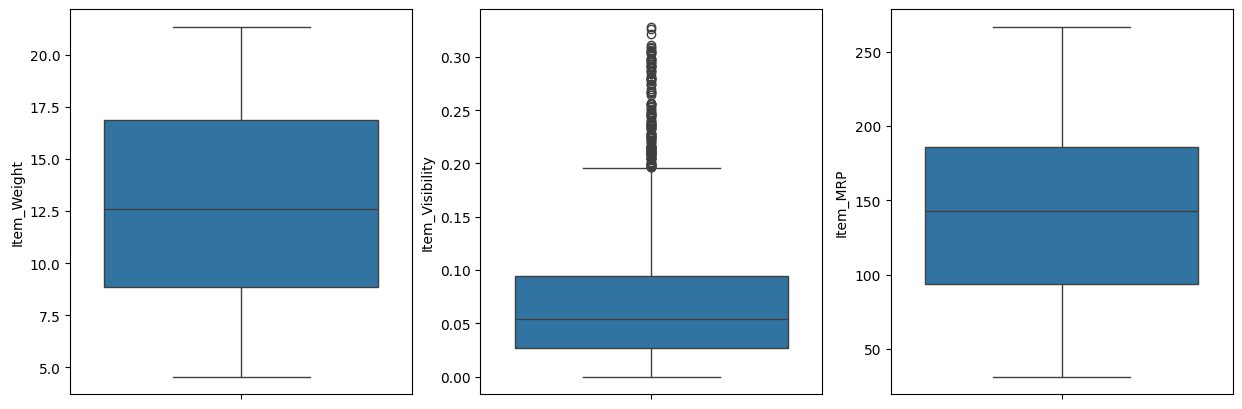

In [111]:
# Checking for the outliers
fig, axes=plt.subplots(1,3, figsize=(15,5))
sns.boxplot(data=cleaned_data['Item_Weight'], ax=axes[0])
sns.boxplot(data=cleaned_data['Item_Visibility'], ax=axes[1])
sns.boxplot(data=cleaned_data['Item_MRP'], ax=axes[2])

Item Visibility has some outliers and we will using the capping method to treat those outliers because we don't want to loose any data using trimming method

In [112]:
Q3=cleaned_data['Item_Visibility'].quantile(0.75)
Q1=cleaned_data['Item_Visibility'].quantile(0.25)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
cleaned_data['Item_Visibility'].clip(lower_bound, upper_bound, inplace=True)

<Axes: ylabel='Item_Visibility'>

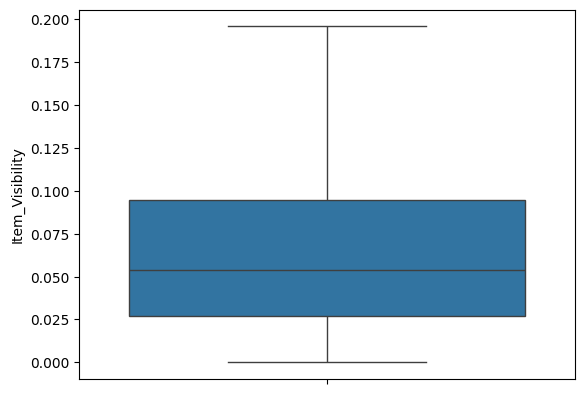

In [113]:
sns.boxplot(cleaned_data['Item_Visibility'])

**Visualization of the Cleaned Data**

In [114]:
cleaned_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Item_Visibility,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,Dairy,249.8092,0.016047,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,Soft Drinks,48.2692,0.019278,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,Meat,141.6180,0.016760,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,Fruits and Vegetables,182.0950,0.000000,OUT010,1998.0,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,Household,53.8614,0.000000,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052


<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

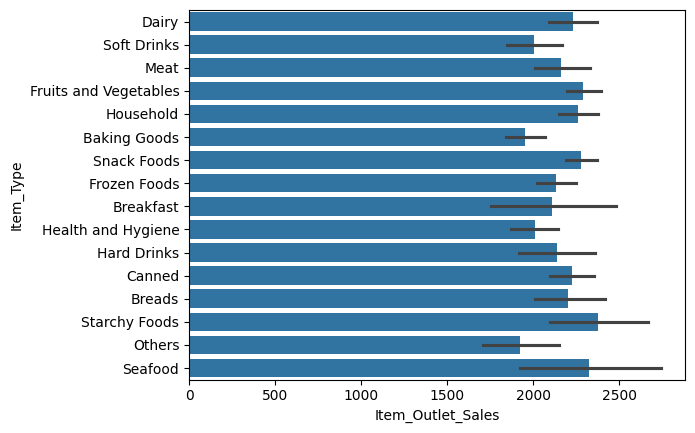

In [115]:
sns.barplot(y='Item_Type', x='Item_Outlet_Sales', data=cleaned_data)

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

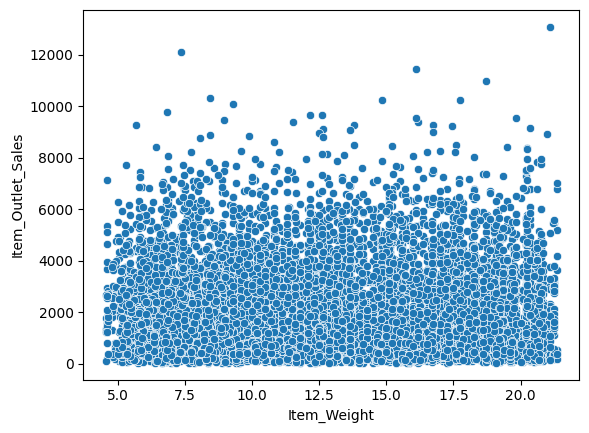

In [116]:
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=cleaned_data)

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

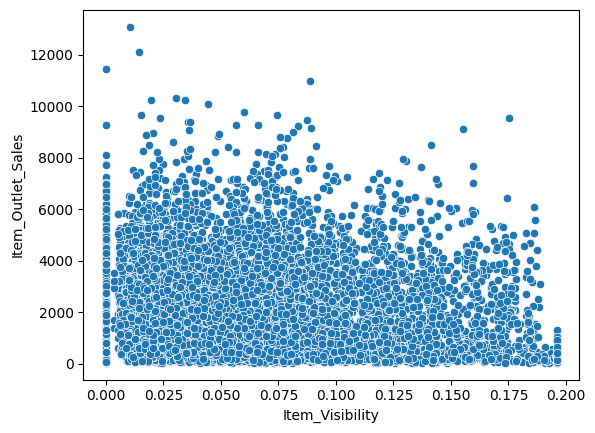

In [117]:
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=cleaned_data)

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

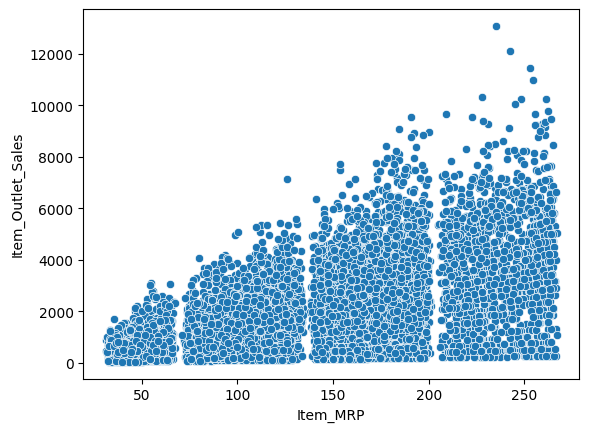

In [118]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=cleaned_data)

<Axes: xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

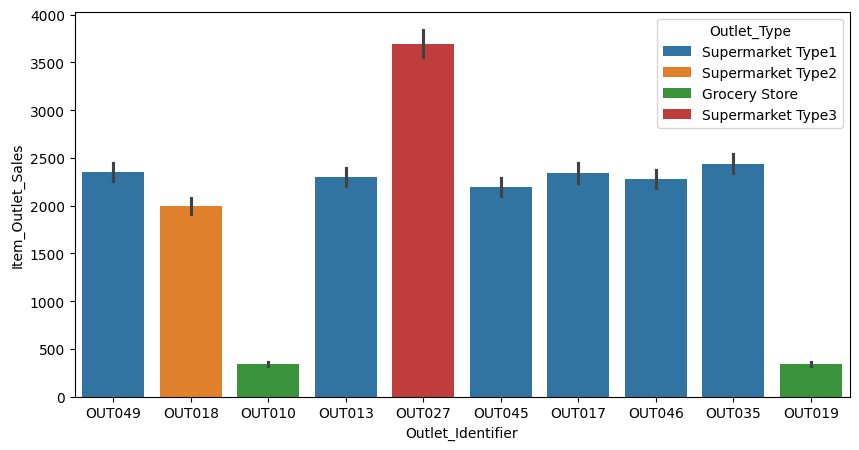

In [119]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=cleaned_data, hue='Outlet_Type')

<Axes: xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

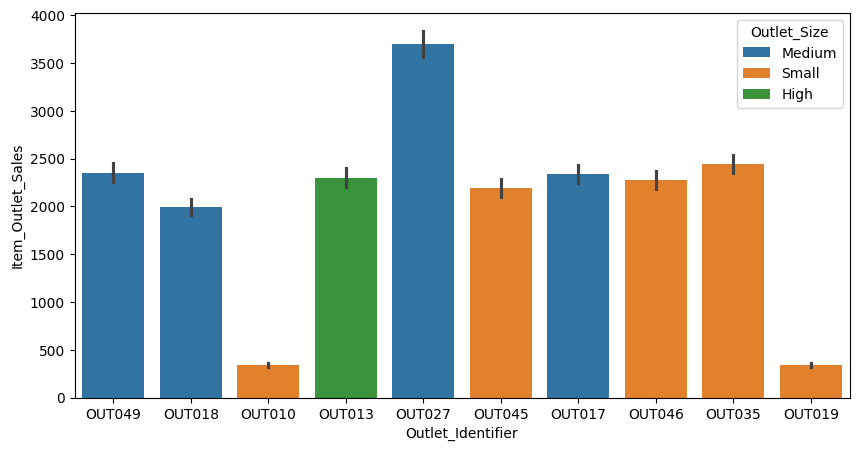

In [120]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=cleaned_data, hue='Outlet_Size')

In [121]:
cleaned_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Item_Visibility,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,Dairy,249.8092,0.016047,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,Soft Drinks,48.2692,0.019278,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,Meat,141.6180,0.016760,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,Fruits and Vegetables,182.0950,0.000000,OUT010,1998.0,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,Household,53.8614,0.000000,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052


Here we will avoid using One Hot Encoder because it will increase the dimensionality of our dataset by a lot

In [122]:
# Encoding the data again for ML training
cleaned_data.loc[:,['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type']]=encode1.fit_transform(cleaned_data.loc[:,['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type']])
cleaned_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Item_Visibility,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,0.0,4.0,249.8092,0.016047,9.0,4.0,Medium,0.0,1.0,3735.1380
1,8.0,5.92,1.0,14.0,48.2692,0.019278,3.0,8.0,Medium,2.0,2.0,443.4228
2,662.0,17.50,0.0,10.0,141.6180,0.016760,9.0,4.0,Medium,0.0,1.0,2097.2700
3,1121.0,19.20,1.0,6.0,182.0950,0.000000,0.0,3.0,Small,2.0,0.0,732.3800
4,1297.0,8.93,0.0,9.0,53.8614,0.000000,1.0,1.0,High,2.0,1.0,994.7052


In [123]:
# Encoding the Outlet size variable with an order
cleaned_data.loc[:,['Outlet_Size']]=encode2.fit_transform(cleaned_data.loc[:,['Outlet_Size']])
cleaned_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Item_Visibility,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,0.0,4.0,249.8092,0.016047,9.0,4.0,1.0,0.0,1.0,3735.1380
1,8.0,5.92,1.0,14.0,48.2692,0.019278,3.0,8.0,1.0,2.0,2.0,443.4228
2,662.0,17.50,0.0,10.0,141.6180,0.016760,9.0,4.0,1.0,0.0,1.0,2097.2700
3,1121.0,19.20,1.0,6.0,182.0950,0.000000,0.0,3.0,0.0,2.0,0.0,732.3800
4,1297.0,8.93,0.0,9.0,53.8614,0.000000,1.0,1.0,2.0,2.0,1.0,994.7052


In [124]:
# Checking the relationship of the variables with each other
cleaned_data.corr(method='spearman').style.background_gradient(cmap='coolwarm')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Item_Visibility,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.047618,-0.115850,0.021152,0.013929,-0.029721,-0.008629,-0.014052,-0.003667,0.004356,-0.003935,0.007701
Item_Weight,0.047618,1.000000,-0.027391,0.035607,0.029644,-0.009576,-0.007547,-0.012693,0.010203,0.003022,-0.001770,0.010322
Item_Fat_Content,-0.115850,-0.027391,1.000000,-0.155922,0.006691,0.053091,0.000971,0.002552,0.004164,-0.001429,0.002710,0.018787
Item_Type,0.021152,0.035607,-0.155922,1.000000,0.037584,-0.048632,0.000394,0.004334,0.001616,0.004237,0.002551,0.019747
Item_MRP,0.013929,0.029644,0.006691,0.037584,1.000000,0.005702,0.002863,0.003782,-0.007381,0.000758,-0.000472,0.562986
Item_Visibility,-0.029721,-0.009576,0.053091,-0.048632,0.005702,1.000000,-0.072219,-0.054903,-0.083698,-0.015720,-0.144395,-0.115084
Outlet_Identifier,-0.008629,-0.007547,0.000971,0.000394,0.002863,-0.072219,1.000000,-0.026383,-0.383082,-0.724150,0.106742,0.204211
Outlet_Establishment_Year,-0.014052,-0.012693,0.002552,0.004334,0.003782,-0.054903,-0.026383,1.000000,-0.044675,0.018426,0.117210,0.042947
Outlet_Size,-0.003667,0.010203,0.004164,0.001616,-0.007381,-0.083698,-0.383082,-0.044675,1.000000,0.467184,0.469588,0.236720
Outlet_Location_Type,0.004356,0.003022,-0.001429,0.004237,0.000758,-0.015720,-0.724150,0.018426,0.467184,1.000000,0.452319,0.063236


In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=cleaned_data.drop(['Item_Outlet_Sales'], axis=1)
X=X.apply(pd.to_numeric, errors='ignore')
y=cleaned_data['Item_Outlet_Sales']
vif_data=pd.DataFrame()
vif_data['Features']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                     Features       VIF
0             Item_Identifier  3.816587
1                 Item_Weight  7.618656
2            Item_Fat_Content  1.563189
3                   Item_Type  3.807397
4                    Item_MRP  5.650763
5             Item_Visibility  2.666905
6           Outlet_Identifier  9.723117
7   Outlet_Establishment_Year  2.880628
8                 Outlet_Size  2.822734
9        Outlet_Location_Type  9.764938
10                Outlet_Type  8.480226


For any column having VIF_value>5 there exists high correlation between the variables so we should drop those columns. But by droping those columns, we will miss out the crucial columns which are very important for our ML training. So instead of droping those columns we will avoid using parametric ML models for the prediction

In [126]:
# Feature scaling the independent variables
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(X)
X=pd.DataFrame(scaled_data, columns=X.columns)
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Item_Visibility,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.100128,0.282525,0.0,0.266667,0.927507,0.081883,1.000000,0.500,0.5,0.0,0.333333
1,0.005135,0.081274,1.0,0.933333,0.072068,0.098369,0.333333,1.000,0.5,1.0,0.666667
2,0.424904,0.770765,0.0,0.666667,0.468288,0.085520,1.000000,0.500,0.5,0.0,0.333333
3,0.719512,0.871986,1.0,0.400000,0.640093,0.000000,0.000000,0.375,0.0,1.0,0.000000
4,0.832478,0.260494,0.0,0.600000,0.095805,0.000000,0.111111,0.125,1.0,1.0,0.333333


In [127]:
# Spliting the data into 80-20 for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# **Machine Learning Models**

**Decision Tree Regressor**

In [128]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
DT=DecisionTreeRegressor()
DT.fit(X_train, y_train)
print(root_mean_squared_error(y_test, DT.predict(X_test)))

1509.4778631159716


**Hyperparameter Tuning using Randomized Search CV:** Here we will use Randomized Search CV for hypertuning. The reason we use Randomized Search CV instead of Search Grid CV is beacause it consumes less RAM and takes less time comparatively.

In [129]:
parameters={
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'max_features': ['sqrt', 'log2', None]
}

In [130]:
from sklearn.model_selection import RandomizedSearchCV # Hyperparameter tuning
rs=RandomizedSearchCV(DT, parameters, cv=5, n_iter=100, n_jobs=-1, scoring='neg_root_mean_squared_error')
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10]},
                   scoring='neg_root_mean_squared_error')

In [131]:
print(rs.best_score_)
print(rs.best_params_)

-1114.660886110019
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 6, 'criterion': 'poisson'}


In [132]:
DT=DecisionTreeRegressor(min_samples_split=4, min_samples_leaf=10, max_features=None, max_depth=6, criterion='squared_error')
DT.fit(X_train, y_train)
print(root_mean_squared_error(y_test, DT.predict(X_test)))

1026.57700456809


Hyperparameter tuning gives us better result

**Random Forest Regressor**

In [133]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train, y_train)
print(root_mean_squared_error(y_test, RF.predict(X_test)))

1085.1693720998978


In [239]:
parameters={
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [1, 3, 5, 7, 9],
    'min_samples_leaf': [1, 3, 5, 7, 9],
    'max_features': ['sqrt', 'log2', None]
}

In [242]:
# Hyperparameter Tuning
rs=RandomizedSearchCV(RF, parameters, cv=5, n_iter=100, n_jobs=-1, scoring='neg_root_mean_squared_error')
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='poisson',
                                                   max_depth=6,
                                                   max_features=None,
                                                   min_samples_leaf=3,
                                                   min_samples_split=7),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 3, 5, 7, 9],
                                        'min_samples_split': [1, 3, 5, 7, 9]},
                   scoring='neg_root_mean_squared_error')

In [243]:
print(rs.best_score_)
print(rs.best_params_)

-1100.847189932279
{'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 6, 'criterion': 'squared_error'}


In [134]:
RF=RandomForestRegressor(min_samples_split=3, min_samples_leaf= 3, max_features= None, max_depth= 6, criterion='friedman_mse')
RF.fit(X_train, y_train)
print(root_mean_squared_error(y_test, RF.predict(X_test)))

1018.7202679749228


Here again Hyperparameter Tuning gives us better result

**Gradient Boost Regressor**

In [121]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(X_train, y_train)
print(root_mean_squared_error(y_test, GB.predict(X_test)))

1033.6321235533587


In [ ]:
parameters={
    'learning_rate': [0.2, 0.4, 0.6, 0.8, 1],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 3, 5, 7, 9],
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'criterion': ['friedman_mse', 'squared_error']
}

In [ ]:
# Hyperparameter Tuning
rs=RandomizedSearchCV(GB, parameters, cv=5, n_iter=100, n_jobs=-1, scoring='neg_root_mean_squared_error')
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.2, 0.4, 0.6, 0.8,
                                                          1],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 3, 5, 7, 9],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1]},
                   scoring='neg_root_mean_squared_error')

In [ ]:
print(rs.best_score_)
print(rs.best_params_)

-1104.6410465848978
{'subsample': 0.9, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': None, 'max_depth': 2, 'loss': 'absolute_error', 'learning_rate': 0.2, 'criterion': 'squared_error'}


In [ ]:
GradientBoostingRegressor(subsample=0.9, min_samples_split=6, min_samples_leaf=7, max_features=None, max_depth=2, loss='absolute_error', learning_rate=0.2, criterion='squared_error')
GB.fit(X_train, y_train)
print(root_mean_squared_error(y_test, GB.predict(X_test)))

1033.1153057498436


**Ada Boost Regressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
AD=AdaBoostRegressor()
AD.fit(X_train, y_train)
print(root_mean_squared_error(y_test, AD.predict(X_test)))

1377.1482224426322


In [ ]:
parameters={
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.2, 0.4, 0.6, 0.8, 1],
    'loss': ['linear', 'square', 'exponential'],
}

In [ ]:
# Hyperparameter Tuning
rs=RandomizedSearchCV(AD, parameters, cv=5, n_iter=100, n_jobs=-1, scoring='neg_root_mean_squared_error')
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.4, 0.6, 0.8,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_root_mean_squared_error')

In [ ]:
print(rs.best_score_)
print(rs.best_params_)

-1175.1460704334809
{'n_estimators': 100, 'loss': 'linear', 'learning_rate': 0.2}


In [ ]:
AD=AdaBoostRegressor(n_estimators=100, learning_rate=0.2, loss='linear')
AD.fit(X_train, y_train)
print(root_mean_squared_error(y_test, AD.predict(X_test)))

1133.235438562161


Ada Boost also gives better result after Hyperparameter Tuning

**XGB Regressor**

In [99]:
from xgboost import XGBRegressor
XGB=XGBRegressor()
XGB.fit(X_train, y_train)
print(root_mean_squared_error(y_test, XGB.predict(X_test)))

1147.8528069713514


In [ ]:
parameters={
    'booster': ['gbtree', 'gblinear', 'dart'],
    'eta': [0.2, 0.4, 0.6, 0.8, 1],
    'gamma': [0, 0.2, 0.4, 0.6, 0.8, 1],
    'max_depth': [2, 4, 6, 8, 10],
    'min_child_weight': [1, 3, 5, 7, 9, 10],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
}

In [ ]:
# Hyperparameter Tuning
rs=RandomizedSearchCV(XGB, parameters, cv=5, n_iter=100, n_jobs=-1, scoring='neg_root_mean_squared_error')
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'eta': [0.2, 0.4, 0.6, 0.8, 1],
                                        'gamma': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7, 9, 10],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1]},
                   scoring='neg_root_mean_squared_error')

In [54]:
print(rs.best_score_)
print(rs.best_params_)

-1098.9123697391483
{'subsample': 0.9, 'min_child_weight': 7, 'max_depth': 2, 'gamma': 1, 'eta': 0.2, 'booster': 'gbtree'}


In [55]:
XGB=XGBRegressor(subsample=0.9, min_child_weight=7, max_depth=2, gamma= 1, eta=0.2, booster='gbtree')
XGB.fit(X_train, y_train)
print(root_mean_squared_error(y_test, XGB.predict(X_test)))

1026.1234147368123


XGB also gives better result after Hyperparameter Tuning

**Support Vector Regressor**

In [127]:
from sklearn.svm import SVR
SVR=SVR()
SVR.fit(X_train, y_train)
print(root_mean_squared_error(y_test, SVR.predict(X_test)))

1603.6630562695416


In [74]:
parameters={
    'C': [1, 1.5, 2],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [75]:
# Hyperparameter Tuning
rs=RandomizedSearchCV(SVR, parameters, cv=5, n_iter=100, n_jobs=-1, scoring='neg_root_mean_squared_error')
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [1, 1.5, 2],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   scoring='neg_root_mean_squared_error')

In [76]:
print(rs.best_score_)
print(rs.best_params_)

-1195.1648048402392
{'kernel': 'poly', 'gamma': 'scale', 'C': 2}


In [128]:
from sklearn.svm import SVR
model_SVR = SVR(kernel='poly', gamma='scale', C=2)
model_SVR.fit(X_train, y_train)
print(root_mean_squared_error(y_test, model_SVR.predict(X_test)))

1110.0144145965985


Hyperparameter Tuning gives better result for SVM as well

**KNN Regressor**

In [105]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor()
KNN.fit(X_train, y_train)
print(root_mean_squared_error(y_test, KNN.predict(X_test)))

1152.0812019141788


In [63]:
parameters={
    'n_neighbors': [3, 5, 7, 9, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2, 3, 4, 5],
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev', 'wminkowski', 'seuclidean', 'mahalanobis']
}

In [64]:
# Hyperparameter Tuning
rs=RandomizedSearchCV(KNN, parameters, cv=5, n_iter=100, n_jobs=-1, scoring='neg_root_mean_squared_error')
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 20, 30, 40, 50],
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan', 'chebyshev',
                                                   'wminkowski', 'seuclidean',
                                                   'mahalanobis'],
                                        'n_neighbors': [3, 5, 7, 9, 13, 15],
                                        'p': [1, 2, 3, 4, 5],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_root_mean_squared_error')

In [65]:
print(rs.best_score_)
print(rs.best_params_)

-1163.604618026386
{'weights': 'distance', 'p': 2, 'n_neighbors': 13, 'metric': 'euclidean', 'leaf_size': 30, 'algorithm': 'kd_tree'}


In [66]:
Knn=KNeighborsRegressor(weights='distance', p=2, n_neighbors=13, metric='euclidean', leaf_size=30, algorithm='kd_tree')
Knn.fit(X_train, y_train)
print(root_mean_squared_error(y_test, Knn.predict(X_test)))

1100.8260100845964


K Neighbours also gives slightly better result after Hyperparameter Tuning

Here Random Forest Regressor with hyperparameter tuning gives us the best prediction and we will proceed with this model for the prediction of test dataset

Training the Entire dataset with Random Forest Regressor along with the best parameters obtained after Hyperparameter Tuning so that we can predict the Item Outlet Sales of the test dataset provided to us.

In [135]:
# Training the entire dataset with Ranndom Forest Regressor
RF=RandomForestRegressor(min_samples_split=3, min_samples_leaf= 3, max_features= None, max_depth= 6, criterion='friedman_mse')
RF.fit(X, y)

RandomForestRegressor(criterion='friedman_mse', max_depth=6, max_features=None,
                      min_samples_leaf=3, min_samples_split=3)

**Preprocessing the Test Dataset**

Since we are going to use the same ML model used to train the Train dataset to predict the Item_Outlet_sales of the Test dataset we are going to preprocess the test dataset the same way we did with the Train Dataset

In [136]:
test_data=pd.read_csv('/content/test_AbJTz2l.csv')
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [137]:
test_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [138]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [139]:
test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [140]:
test_data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)
test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [141]:
test_data.nunique()

,0
Item_Identifier,1543
Item_Weight,410
Item_Fat_Content,2
Item_Visibility,5277
Item_Type,16
Item_MRP,4402
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


Dividing the test dataset into Item dataset and outlet dataset for filling the missing values using knn imputation

In [142]:
Item_test_data=test_data.loc[:,['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Type','Item_MRP']]

In [143]:
# Encoding the test item data
from sklearn.preprocessing import OrdinalEncoder
encode1=OrdinalEncoder()
Item_test_data.loc[:,['Item_Identifier', 'Item_Fat_Content', 'Item_Type']]=encode1.fit_transform(Item_test_data.loc[:,['Item_Identifier', 'Item_Fat_Content', 'Item_Type']])
Item_test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP
0,1103.0,20.750,0.0,13.0,107.8622
1,1067.0,8.300,1.0,4.0,87.3198
2,1406.0,14.600,0.0,11.0,241.7538
3,809.0,7.315,0.0,13.0,155.0340
4,1184.0,NaN,1.0,4.0,234.2300


In [144]:
imputed_data=imputer.fit_transform(Item_test_data)
Item_test_data=pd.DataFrame(imputed_data, columns=Item_test_data.columns)
Item_test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP
0,1103.0,20.750,0.0,13.0,107.8622
1,1067.0,8.300,1.0,4.0,87.3198
2,1406.0,14.600,0.0,11.0,241.7538
3,809.0,7.315,0.0,13.0,155.0340
4,1184.0,13.600,1.0,4.0,234.2300


In [145]:
Item_test_data.loc[:,['Item_Identifier', 'Item_Fat_Content', 'Item_Type']]=encode1.inverse_transform(Item_test_data.loc[:,['Item_Identifier', 'Item_Fat_Content', 'Item_Type']])
Item_test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP
0,FDW58,20.750,Low Fat,Snack Foods,107.8622
1,FDW14,8.300,Regular,Dairy,87.3198
2,NCN55,14.600,Low Fat,Others,241.7538
3,FDQ58,7.315,Low Fat,Snack Foods,155.0340
4,FDY38,13.600,Regular,Dairy,234.2300


In [146]:
Outlet_test_data=test_data.loc[:,['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
Outlet_test_data.head()

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,OUT010,1998,NaN,Tier 3,Grocery Store
3,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [147]:
# Encoding the dataset
encode2=OrdinalEncoder(categories=[['Small', 'Medium', 'High', np.nan]])
Outlet_test_data.loc[:,['Outlet_Identifier','Outlet_Location_Type','Outlet_Type']]=encode1.fit_transform(Outlet_test_data.loc[:,['Outlet_Identifier','Outlet_Location_Type','Outlet_Type']])
Outlet_test_data.loc[:,['Outlet_Size']]=encode2.fit_transform(Outlet_test_data.loc[:,['Outlet_Size']])
Outlet_test_data.head()

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.0,1999,1.0,0.0,1.0
1,2.0,2007,NaN,1.0,1.0
2,0.0,1998,NaN,2.0,0.0
3,2.0,2007,NaN,1.0,1.0
4,5.0,1985,1.0,2.0,3.0


In [148]:
imputed_data1=imputer1.fit_transform(Outlet_test_data)
Outlet_test_data=pd.DataFrame(imputed_data1, columns=Outlet_test_data.columns)
Outlet_test_data.head()

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.0,1999.0,1.0,0.0,1.0
1,2.0,2007.0,1.0,1.0,1.0
2,0.0,1998.0,0.0,2.0,0.0
3,2.0,2007.0,1.0,1.0,1.0
4,5.0,1985.0,1.0,2.0,3.0


In [149]:
Outlet_test_data.loc[:,['Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']]=encode1.inverse_transform(Outlet_test_data.loc[:,['Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']])
Outlet_test_data.loc[:,['Outlet_Size']]=encode2.inverse_transform(Outlet_test_data.loc[:,['Outlet_Size']])
Outlet_test_data.head()

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT049,1999.0,Medium,Tier 1,Supermarket Type1
1,OUT017,2007.0,Medium,Tier 2,Supermarket Type1
2,OUT010,1998.0,Small,Tier 3,Grocery Store
3,OUT017,2007.0,Medium,Tier 2,Supermarket Type1
4,OUT027,1985.0,Medium,Tier 3,Supermarket Type3


In [150]:
test_Item_visibility=test_data.loc[:,['Item_Visibility']]
cleaned_test_data=pd.concat([Item_test_data, test_Item_visibility, Outlet_test_data], axis=1)
cleaned_test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Item_Visibility,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,Snack Foods,107.8622,0.007565,OUT049,1999.0,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,Dairy,87.3198,0.038428,OUT017,2007.0,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,Others,241.7538,0.099575,OUT010,1998.0,Small,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,Snack Foods,155.0340,0.015388,OUT017,2007.0,Medium,Tier 2,Supermarket Type1
4,FDY38,13.600,Regular,Dairy,234.2300,0.118599,OUT027,1985.0,Medium,Tier 3,Supermarket Type3


In [151]:
# Checking for the null values
cleaned_test_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Type,0
Item_MRP,0
Item_Visibility,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [152]:
# Applying log function to Item_visibility of test dataset just as we did to train dataset
# item_visibility=np.log(cleaned_test_data.loc[:,['Item_Visibility']])+6
# cleaned_test_data.loc[:,['Item_Visibility']]=item_visibility

<Axes: ylabel='Item_MRP'>

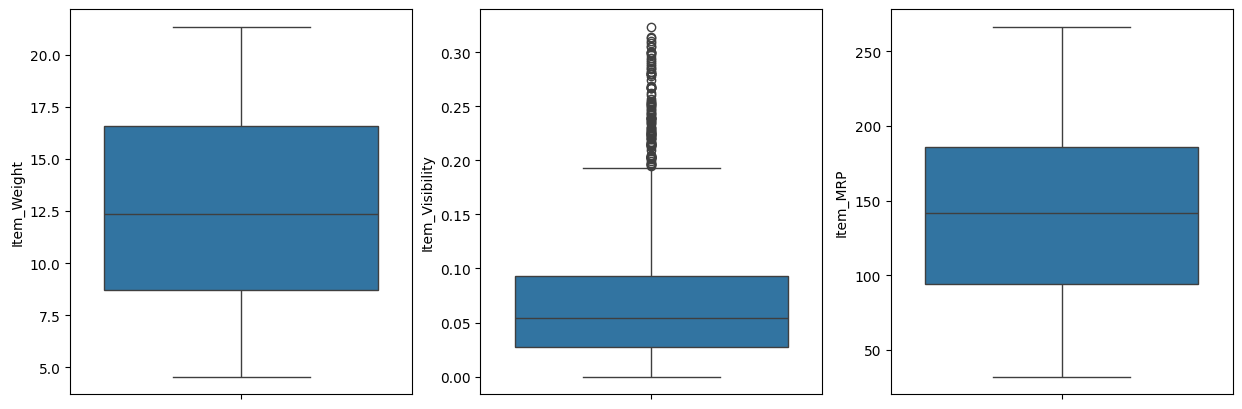

In [153]:
# Checking for the outliers
fig, axes=plt.subplots(1,3, figsize=(15,5))
sns.boxplot(data=cleaned_test_data['Item_Weight'], ax=axes[0])
sns.boxplot(data=cleaned_test_data['Item_Visibility'], ax=axes[1])
sns.boxplot(data=cleaned_test_data['Item_MRP'], ax=axes[2])

In [154]:
# Treating the outliers
Q3=cleaned_test_data['Item_Visibility'].quantile(0.75)
Q1=cleaned_test_data['Item_Visibility'].quantile(0.25)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
cleaned_test_data['Item_Visibility'].clip(lower_bound, upper_bound, inplace=True)

<Axes: ylabel='Item_Visibility'>

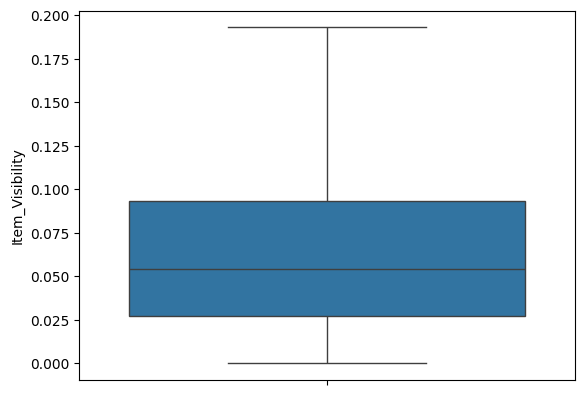

In [155]:
sns.boxplot(cleaned_test_data['Item_Visibility'])

In [156]:
# Encoding the categorical variables of the test dataset
cleaned_test_data.loc[:,['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type']]=encode1.fit_transform(cleaned_test_data.loc[:,['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type']])
cleaned_test_data.loc[:,['Outlet_Size']]=encode2.fit_transform(cleaned_test_data.loc[:,['Outlet_Size']])
cleaned_test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Item_Visibility,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103.0,20.750,0.0,13.0,107.8622,0.007565,9.0,4.0,1.0,0.0,1.0
1,1067.0,8.300,1.0,4.0,87.3198,0.038428,2.0,7.0,1.0,1.0,1.0
2,1406.0,14.600,0.0,11.0,241.7538,0.099575,0.0,3.0,0.0,2.0,0.0
3,809.0,7.315,0.0,13.0,155.0340,0.015388,2.0,7.0,1.0,1.0,1.0
4,1184.0,13.600,1.0,4.0,234.2300,0.118599,5.0,0.0,1.0,2.0,3.0


In [157]:
# Feature scaling the independent variables
scaled_test_data=scaler.fit_transform(cleaned_test_data)
cleaned_test_data=pd.DataFrame(scaled_test_data, columns=cleaned_test_data.columns)
cleaned_test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Item_Visibility,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.715305,0.964275,0.0,0.866667,0.323413,0.039179,1.000000,0.500,0.5,0.0,0.333333
1,0.691958,0.222983,1.0,0.266667,0.235849,0.199018,0.222222,0.875,0.5,0.5,0.333333
2,0.911803,0.598095,0.0,0.733333,0.894140,0.515702,0.000000,0.375,0.0,1.0,0.000000
3,0.524643,0.164335,0.0,0.866667,0.524488,0.079697,0.222222,0.875,0.5,0.5,0.333333
4,0.767834,0.538553,1.0,0.266667,0.862069,0.614230,0.555556,0.000,0.5,1.0,1.000000


After Encoding the test dataset we will predict the Item_Outlet_sales using Random Forest Regressor with the best parameters obtained during Cross Validation

In [158]:
Predicted_value=RF.predict(cleaned_test_data)

In [159]:
Predicted_value=pd.DataFrame(Predicted_value, columns=['Item_Outlet_Sales'])
Predicted_value.head()

,Item_Outlet_Sales
0,1650.571198
1,1357.438070
2,636.765313
3,2468.439304
4,6151.839573


In [160]:
result=pd.concat([test_data['Item_Identifier'], test_data['Outlet_Identifier'], Predicted_value], axis=1)
result.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1650.571198
1,FDW14,OUT017,1357.438070
2,NCN55,OUT010,636.765313
3,FDQ58,OUT017,2468.439304
4,FDY38,OUT027,6151.839573


In [161]:
result.to_csv('Random_Forest_Item_Outlet_Sales.csv', index=False)